# Extremal Kerr black hole

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

The computations make use of tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr).

In [1]:
version()

'SageMath version 9.3.rc2, Release Date: 2021-04-06'

First we set up the notebook to display mathematical objects using LaTeX rendering:

In [2]:
%display latex

To speed up computations, we ask for running them in parallel on 8 threads:

In [3]:
Parallelism().set(nproc=8)

## Spacetime manifold

We declare the Kerr spacetime as a 4-dimensional Lorentzian manifold $M$:

In [4]:
M = Manifold(4, 'M', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


We then introduce (3+1 version of) the **Kerr coordinates** $(\tilde{t},r,\theta,\tilde{\varphi})$ as a chart `KC` on $M$, via the method `chart()`. The argument of the latter is a string (delimited by `r"..."` because of the backslash symbols) expressing the coordinates names, their ranges (the default is $(-\infty,+\infty)$) and their LaTeX symbols:

In [5]:
KC.<tt,r,th,tph> = M.chart(r"tt:\tilde{t} r th:(0,pi):\theta tph:(0,2*pi):periodic:\tilde{\varphi}") 
print(KC); KC

Chart (M, (tt, r, th, tph))


Chart (M, (tt, r, th, tph))

In [6]:
KC.coord_range()

tt: (-oo, +oo); r: (-oo, +oo); th: (0, pi); tph: [0, 2*pi] (periodic)

## Metric tensor 

The mass parameter $m$ of the extremal Kerr spacetime is declared as a symbolic variable:

In [7]:
m = var('m', domain='real')

We get the (yet undefined) spacetime metric:

In [8]:
g = M.metric()

and initialize it by providing its components in the coordinate frame associated with the Kerr coordinates, which is the current manifold's default frame:

In [9]:
rho2 = r^2 + (m*cos(th))^2
g[0,0] = - (1 - 2*m*r/rho2)
g[0,1] = 2*m*r/rho2
g[0,3] = -2*m^2*r*sin(th)^2/rho2
g[1,1] = 1 + 2*m*r/rho2
g[1,3] = -m*(1 + 2*m*r/rho2)*sin(th)^2
g[2,2] = rho2
g[3,3] = (r^2 + m^2 + 2*m^3*r*sin(th)^2/rho2)*sin(th)^2
g.display()

g = (2*m*r/(m^2*cos(th)^2 + r^2) - 1) dtt*dtt + 2*m*r/(m^2*cos(th)^2 + r^2) dtt*dr - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dtt*dtph + 2*m*r/(m^2*cos(th)^2 + r^2) dr*dtt + (2*m*r/(m^2*cos(th)^2 + r^2) + 1) dr*dr - m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2 dr*dtph + (m^2*cos(th)^2 + r^2) dth*dth - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dtph*dtt - m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2 dtph*dr + (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2 dtph*dtph

A matrix view of the components with respect to the manifold's default vector frame:

In [10]:
g[:]

[                                2*m*r/(m^2*cos(th)^2 + r^2) - 1                                     2*m*r/(m^2*cos(th)^2 + r^2)                                                               0                        -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2)]
[                                    2*m*r/(m^2*cos(th)^2 + r^2)                                 2*m*r/(m^2*cos(th)^2 + r^2) + 1                                                               0                  -m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2]
[                                                              0                                                               0                                             m^2*cos(th)^2 + r^2                                                               0]
[                       -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2)                  -m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2                                                               0 (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2]

The list of the non-vanishing components:

In [11]:
g.display_comp()

g_tt,tt = 2*m*r/(m^2*cos(th)^2 + r^2) - 1 
g_tt,r = 2*m*r/(m^2*cos(th)^2 + r^2) 
g_tt,tph = -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) 
g_r,tt = 2*m*r/(m^2*cos(th)^2 + r^2) 
g_r,r = 2*m*r/(m^2*cos(th)^2 + r^2) + 1 
g_r,tph = -m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2 
g_th,th = m^2*cos(th)^2 + r^2 
g_tph,tt = -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) 
g_tph,r = -m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2 
g_tph,tph = (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2

Let us check that we are dealing with a solution of the vacuum Einstein equation:

In [12]:
#dg.ricci().display()

## Regions $M_{\rm I}$ and $M_{\rm III}$

In [13]:
#M_I = M.open_subset('M_I', latex_name=r'M_{\rm I}', coord_def={KC: r>m})
#KC.restrict(M_I).coord_range()

In [14]:
#M_III = M.open_subset('M_III', latex_name=r'M_{\rm III}', coord_def={KC: r<m})
#KC.restrict(M_III).coord_range()

## Boyer-Lindquist coordinates

Let us introduce on the chart of Boyer-Lindquist coordinates $(t,r,\theta,\varphi)$:

In [15]:
BL.<t,r,th,ph> = M.chart(r"t r th:(0,pi):\theta ph:(0,2*pi):periodic:\varphi") 
print(BL); BL

Chart (M, (t, r, th, ph))


Chart (M, (t, r, th, ph))

In [16]:
BL.coord_range()

t: (-oo, +oo); r: (-oo, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

In [17]:
KC_to_BL = KC.transition_map(BL, [tt + 2*m^2/(r-m) - 2*m*ln(abs(r-m)/m),
                                  r,
                                  th,
                                  tph + m/(r-m)])
KC_to_BL.display()

t = -2*m*log(abs(-m + r)/m) - 2*m^2/(m - r) + tt
r = r
th = th
ph = tph - m/(m - r)

In [18]:
KC_to_BL.inverse().display()

tt = -(2*m^2*log(m) - 2*m*r*log(m) - 2*m^2 - (m - r)*t - 2*(m^2 - m*r)*log(abs(-m + r)))/(m - r)
r = r
th = th
tph = (m*ph - ph*r + m)/(m - r)

In [19]:
g.display(BL)

g = -(m^2*cos(th)^2 - 2*m*r + r^2)/(m^2*cos(th)^2 + r^2) dt*dt - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dt*dph + (m^2*cos(th)^2 + r^2)/(m^2 - 2*m*r + r^2) dr*dr + (m^2*cos(th)^2 + r^2) dth*dth - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dph*dt + (2*m^3*r*sin(th)^4 + (m^2*r^2 + r^4 + (m^4 + m^2*r^2)*cos(th)^2)*sin(th)^2)/(m^2*cos(th)^2 + r^2) dph*dph

### Plot of the hypersurfaces $t=\mathrm{const}$ in terms of the Kerr coordinates

The plot is performed via the method `plot` of the Boyer-Lindquist chart:

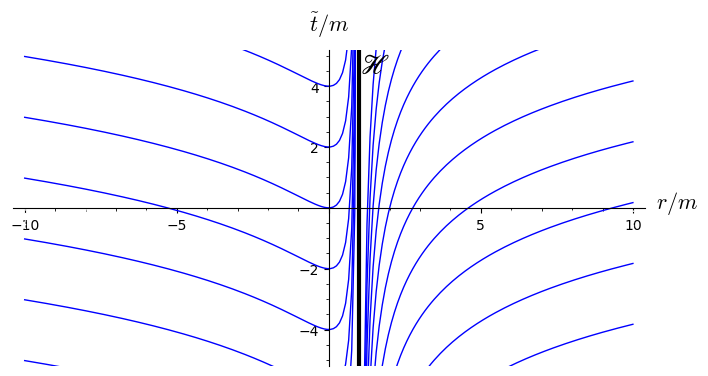

In [20]:
graph = BL.plot(KC, ambient_coords=(r, tt), fixed_coords={th: pi/2, ph: 0}, 
                ranges={t: (-10, 10), r: (-10, 10)}, steps={t: 2, r: 2}, 
                plot_points=200, style={t: ':', r: '-'}, color={t: 'white', r: 'blue'},
                parameters={m: 1})
Hor = line(((1, -8), (1, 8)), color='black', thickness=3) + \
      text(r'$\mathscr{H}$', (1.5, 4.7), color='black', fontsize=20)
graph += Hor
graph.set_aspect_ratio(1)
graph.save("exk_BL_slicing.pdf", axes_labels=[r"$r/m$", r"$\tilde{t}/m$"], 
           ymin=-5, ymax=5, figsize=7)
graph.show(axes_labels=[r"$r/m$", r"$\tilde{t}/m$"], ymin=-5, ymax=5, figsize=7)

## Ingoing principal null geodesics

In [21]:
k = M.vector_field(1, -1, 0, 0, name='k')
k.display()

k = d/dtt - d/dr

Let us check that $k$ is a null vector:

In [22]:
g(k, k).expr()

0

Check of $\nabla_k k = 0$:

In [23]:
nabla = g.connection()

In [24]:
nabla(k).contract(k).display()

0

Expression of $k$ with respect to the Boyer-Lindquist frame:

In [25]:
k.display(BL)

k = (m^2 + r^2)/(m^2 - 2*m*r + r^2) d/dt - d/dr + m/(m^2 - 2*m*r + r^2) d/dph

## Outgoing principal null geodesics

In [26]:
el = M.vector_field(1/2 + m*r/(r^2 + m^2),
                    1/2 - m*r/(r^2 + m^2),
                    0,
                    m/(r^2 + m^2),
                    name='el', latex_name=r'\ell')
el.display()

el = (m*r/(m^2 + r^2) + 1/2) d/dtt + (-m*r/(m^2 + r^2) + 1/2) d/dr + m/(m^2 + r^2) d/dtph

Let us check that $\ell$ is a null vector:

In [27]:
g(el, el).expr()

0

Expression of $\ell$ with respect to the Boyer-Lindquist frame:

In [28]:
el.display(BL)

el = 1/2 d/dt + (-m*r/(m^2 + r^2) + 1/2) d/dr + 1/2*m/(m^2 + r^2) d/dph

Computation of $\nabla_\ell \ell$:

In [29]:
acc = nabla(el).contract(el)
acc.display()

-1/2*(m^5 + 2*m^4*r - 2*m^2*r^3 - m*r^4)/(m^6 + 3*m^4*r^2 + 3*m^2*r^4 + r^6) d/dtt - 1/2*(m^5 - 2*m^4*r + 2*m^2*r^3 - m*r^4)/(m^6 + 3*m^4*r^2 + 3*m^2*r^4 + r^6) d/dr - (m^4 - m^2*r^2)/(m^6 + 3*m^4*r^2 + 3*m^2*r^4 + r^6) d/dtph

We check that $\nabla_\ell \ell = \kappa \ell$:

In [30]:
kappa = acc[0] / el[0]
kappa

-(m^3 - m*r^2)/(m^4 + 2*m^2*r^2 + r^4)

In [31]:
kappa.factor()

-(m + r)*(m - r)*m/(m^2 + r^2)^2

In [32]:
(acc/kappa).display()

1/2*(m^2 + 2*m*r + r^2)/(m^2 + r^2) d/dtt + 1/2*(m^2 - 2*m*r + r^2)/(m^2 + r^2) d/dr + m/(m^2 + r^2) d/dtph

In [33]:
acc == kappa*el

True

## Plot of principal null geodesics

In [34]:
u, v = var('u v')
tt_in(r,v) = v - r
tt_in

(r, v) |--> -r + v

In [35]:
tt_out(r, u) = u + r - 4/(r - 1) + 4*ln(abs(r - 1))
tt_out

(r, u) |--> r + u - 4/(r - 1) + 4*log(abs(r - 1))

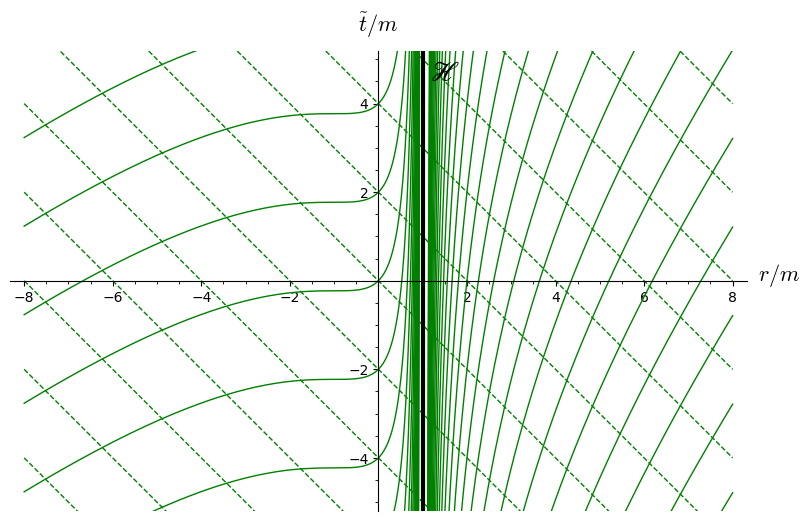

In [36]:
rmin = -8; rmax = 8
graph = Graphics()
for u0 in range(-40, 40, 2):
    graph += plot(tt_out(r, u0), (r, rmin, rmax), color='green', 
                  axes_labels=[r"$r/m$", r"$\tilde{t}/m$"])
for v0 in range(-20, 20, 2):
    graph += plot(tt_in(r, v0), (r, rmin, rmax), color='green', linestyle='--')

graph += Hor
graph.set_aspect_ratio(1)
graph.show(ymin=-5, ymax=5, figsize=8)

We add the vectors $k$ and $\ell$ at the intersection of the $v=6m$ ingoing geodesic with the $u=-6m$ outgoing one:

In [37]:
u0, v0 = -6, 6
r0 = RDF(find_root(tt_in(r, v0) == tt_out(r, u0), 2, 6))
tt0 = tt_in(r0, v0)
tt0, r0

(1.7455241690199994, 4.254475830980001)

In [38]:
p0 = M((tt0, r0, pi/2, 0), name='p_0')
k0 = k.at(p0)
print(k0)

Tangent vector k at Point p_0 on the 4-dimensional Lorentzian manifold M


In [39]:
el0 = el.at(p0)
print(el0)

Tangent vector el at Point p_0 on the 4-dimensional Lorentzian manifold M


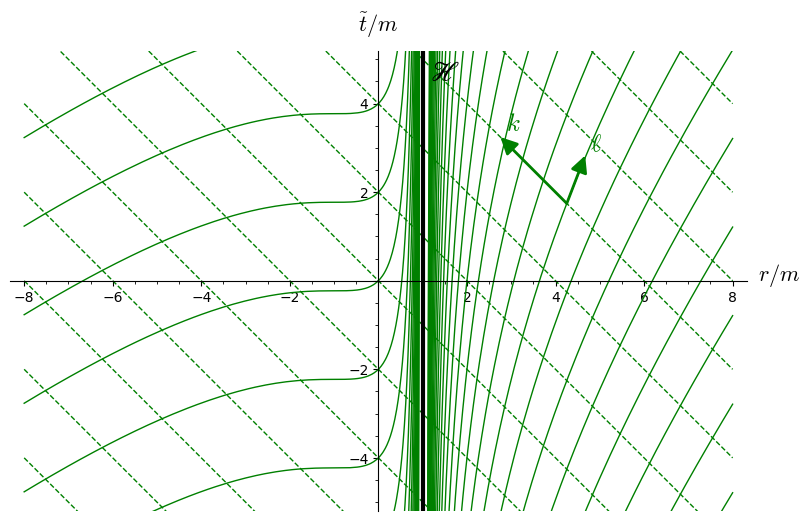

In [40]:
graph +=  k0.plot(chart=KC, ambient_coords=(r, tt), color='green', 
                  scale=1.5, fontsize=18, label_offset=0.3)  \
          + el0.plot(chart=KC, ambient_coords=(r, tt), color='green', 
                     parameters={m: 1}, scale=1.5, fontsize=18,
                     label_offset=0.25)
graph.save("exk_princ_null_geod.pdf", ymin=-5, ymax=5, figsize=8)
graph.show(ymin=-5, ymax=5, figsize=8)

In [41]:
U(r) = u - tt_out(r, u)
U(r)

-r + 4/(r - 1) - 4*log(abs(r - 1))

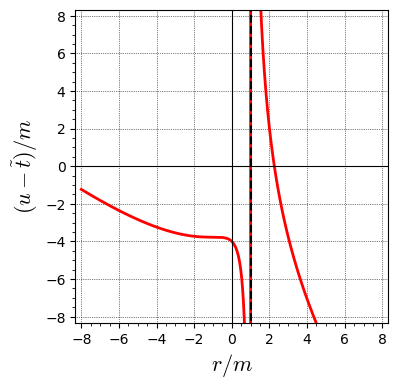

In [42]:
graph = plot(U(r), (r, -8, 8), color='red', thickness=2, 
             axes_labels=[r"$r/m$", r"$(u - \tilde{t})/m$"], frame=True, 
             gridlines=True)
graph += line(((1, -10), (1, 10)), color='black', thickness=1.5, linestyle='--') 
show(graph, aspect_ratio=1, ymin=-8, ymax=8)

In [43]:
ttphi(r) = 2 / (r - 1)
ttphi(r)

2/(r - 1)

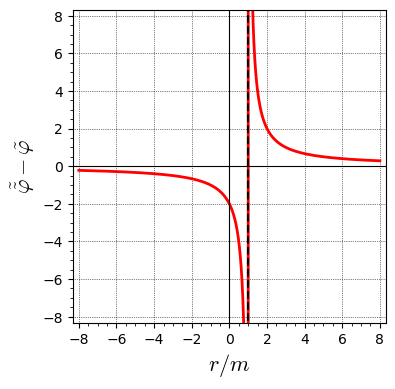

In [44]:
graph = plot(ttphi(r), (r, -8, 8), color='red', thickness=2, 
             axes_labels=[r"$r/m$", r"$\tilde{\tilde{\varphi}} - \tilde{\varphi}$"], 
             frame=True, gridlines=True)
graph += line(((1, -10), (1, 10)), color='black', thickness=1.5, linestyle='--')
show(graph, aspect_ratio=1, ymin=-8, ymax=8)